In [7]:
#libraries and packages needed:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

## accuracy analysis:

In [8]:
#report vs presentantion:
mpl.rc('font', family = 'serif')
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble = r'\usepackage{amsmath}')
mpl.rcParams['figure.figsize'] = [10, 10]

what = 'report' #'presentation'

if what == 'presentation' :
    
    mpl.rcParams['font.size'] = 24
    mpl.rc('xtick', labelsize = 18) 
    mpl.rc('ytick', labelsize = 18)
    annotationstype = False
    median_label = r'\textbf{Median [cm}$\boldsymbol{^{-1}]}$'
    
    file = 'timings_presentation.csv'
    
    # levels of theory:
    lots = ['B971', 'B3LYP', 'wB97XD', 'M062X', 'B2PLYP']
    lots_labels = ['B97-1', 'B3LYP', r'$\omega$B97X-D', 'M06-2X', 'B2PLYP']

    # basis sets:
    bss = ['6-31Gs', 'pcseg-1', 'AUG-pcseg-1', 'Def2SVPD', 'cc-pVDZ', 'pcseg-2', 'AUG-pcseg-2', 'Def2TZVPD', 'cc-pVTZ']
    bss_labels = ['6-31G*', 'pcseg-1', 'aug-pcseg-1', 'def2-SVPD', 'cc-pVDZ', 'pcseg-2', 'aug-pcseg-2', 'def2-TZVPD', 'cc-pVTZ']
    
elif what == 'report' :
    
    mpl.rcParams['font.size'] = 16
    mpl.rc('xtick', labelsize = 14) 
    mpl.rc('ytick', labelsize = 14)
    annotationstype = True
    median_label = r'\textbf{Median/Q2 [cm}$\boldsymbol{^{-1}]}$'
        
    file = 'timings_report.csv'
    
    # levels of theory:
    lots = ['B3LYP', 'B971', 'PBE1PBE', 'TPSSh', 'M062X', 'wB97XD', 'B2PLYP', 'B2PLYPD']
    lots_labels = ['B3LYP', 'B97-1', 'PBE0', 'TPSSh', 'M06-2X', r'$\omega$B97X-D', 'B2PLYP', 'B2PLYP-D']

    # basis sets:
    bss = ['6-31Gs', '6-31Gss', 'pc-1', 'pcseg-1', 'Def2SVP', 'cc-pVDZ', 'AUG-pcseg-1', 'Def2SVPD', 'AUG-cc-pVDZ', 'pc-2', 'pcseg-2', 'Def2TZVPD', 'cc-pVTZ', 'AUG-pcseg-2']
    bss_labels = ['6-31G*', '6-31G**', 'pc-1', 'pcseg-1', 'def2-SVP', 'cc-pVDZ', 'aug-pcseg-1', 'def2-SVPD', 'aug-cc-pVDZ', 'pc-2', 'pcseg-2', 'def2-TZVPD', 'cc-pVTZ', 'aug-pcseg-2']

In [9]:
#directories:
general_directory = '\\Users\\natia\\OneDrive\\Pulpit\\benchmark paper'
input_data = pd.read_csv(f'{general_directory}\\results\\TOTAL_frequency_specific_anharmonic.csv')

#data frame to store all accuracy data:
accuracy_df = {'Method' : [],
               'Basis' : [],
               'ModChemClass' : [],
               'MAE' : [],
               'Median/Q2' : [],
               '75th Percentile/Q3' : []
              }

accuracy_df = pd.DataFrame(accuracy_df)

for bs in bss :
    
    for lot in lots :
        
        for lot_all, bs_all, modchemclass, mae, median, q3 in zip(input_data['Method'], input_data['Basis_Set'], input_data['ModChem_Class'], input_data['MAE_ModChem_mean'], input_data['Q2_ModChem_mean'], input_data['Q3_ModChem_mean']) : 

            if bs == bs_all and lot == lot_all :

                accuracy_df.loc[len(accuracy_df.index)] = [lot, bs, modchemclass, mae, median, q3] 

# accuracy_df = pd.DataFrame()         
# accuracy_df['Method'] = input_data['Method']
# accuracy_df['Basis'] = input_data['Basis_Set']
# accuracy_df['MAE'] = input_data['MAE_ModChem_mean']
# accuracy_df['Median/Q2'] = input_data['Q2_ModChem_mean']
# accuracy_df['75th Percentile/Q3'] = input_data['Q3_ModChem_mean']

#sorting the data in order of levels of theory (lots) and basis sets (bss):
accuracy_df['Method'] = pd.Categorical(accuracy_df['Method'], categories = lots, ordered = True)
accuracy_df['Basis'] = pd.Categorical(accuracy_df['Basis'], categories = bss, ordered = True)
accuracy_df = accuracy_df.sort_values(['Method', 'Basis'])
accuracy_df = accuracy_df.reset_index(drop = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None) :
    
    print(accuracy_df)

      Method        Basis ModChemClass        MAE  Median/Q2  \
0      B3LYP       6-31Gs    Hybrid/DZ  20.314399  11.143601   
1      B3LYP      6-31Gss    Hybrid/DZ  18.781276  10.413030   
2      B3LYP         pc-1    Hybrid/DZ  21.236402  13.582581   
3      B3LYP      pcseg-1    Hybrid/DZ  20.965600  12.987981   
4      B3LYP      Def2SVP    Hybrid/DZ  22.007283  13.810097   
5      B3LYP      cc-pVDZ    Hybrid/DZ  23.733933  13.369130   
6      B3LYP  AUG-pcseg-1    Hybrid/DZ  21.652316  12.803932   
7      B3LYP     Def2SVPD    Hybrid/DZ  22.266356  14.226773   
8      B3LYP  AUG-cc-pVDZ    Hybrid/DZ  25.318956  13.441223   
9      B3LYP         pc-2    Hybrid/TZ  19.084172  10.845534   
10     B3LYP      pcseg-2    Hybrid/TZ  19.187957  10.819765   
11     B3LYP    Def2TZVPD    Hybrid/TZ  19.437834  11.057389   
12     B3LYP      cc-pVTZ    Hybrid/TZ  19.490055  11.230414   
13     B3LYP  AUG-pcseg-2    Hybrid/TZ  18.301092  10.755084   
14      B971       6-31Gs    Hybrid/DZ  

In [10]:
#getting the max and min values of each statistic:
max_mae = accuracy_df['MAE'].max()
min_mae = accuracy_df['MAE'].min()

max_median = accuracy_df['Median/Q2'].max()
min_median = accuracy_df['Median/Q2'].min()

max_q3 = accuracy_df['75th Percentile/Q3'].max()
min_q3 = accuracy_df['75th Percentile/Q3'].min()

In [11]:
#rounding the statistic values and setting column names to basis sets and setting row names (indexes) to levels of theory: 
accuracy_df_mae = accuracy_df[['Basis', 'Method', 'MAE']].pivot_table(columns = 'Basis', index = 'Method', values = 'MAE')
accuracy_df_mae = accuracy_df_mae[bss].round(1)

accuracy_df_median = accuracy_df[['Basis', 'Method', 'Median/Q2']].pivot_table(columns = 'Basis', index = 'Method', values = 'Median/Q2')
accuracy_df_median = accuracy_df_median[bss].round(1)

accuracy_df_q3 = accuracy_df[['Basis', 'Method', '75th Percentile/Q3']].pivot_table(columns = 'Basis', index = 'Method', values = '75th Percentile/Q3')
accuracy_df_q3 = accuracy_df_q3[bss].round(1)

C:\Users\natia\AppData\Local\Temp\ipykernel_18460\431672299.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  accuracy_df_mae = accuracy_df[['Basis', 'Method', 'MAE']].pivot_table(columns = 'Basis', index = 'Method', values = 'MAE')
C:\Users\natia\AppData\Local\Temp\ipykernel_18460\431672299.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  accuracy_df_median = accuracy_df[['Basis', 'Method', 'Median/Q2']].pivot_table(columns = 'Basis', index = 'Method', values = 'Median/Q2')
C:\Users\natia\AppData\Local\Temp\ipykernel_18460\431672299.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of 

## accuracy vs timings analysis:

In [12]:
#reading in all timings data:
all_timings_data = pd.read_csv(f'{general_directory}\\{file}')
timings = all_timings_data['Timing in kSU']
timings.index = all_timings_data['Method'] + '/' + all_timings_data['Basis']

#dividing the timings data into high, mid and low:
high_mcs = []
mid_mcs = []
low_mcs = []

for t in timings :
    
    if t > 2.5 : #high >2.5 kSU
        
        high_mcs.append(timings.index[timings == t][0])
        
    elif t > 0.5 : #mid 2.5-0.5 kSU
        
        mid_mcs.append(timings.index[timings == t][0])
        
    elif t > 0 : #low 0.5-0 kSU
        
        low_mcs.append(timings.index[timings == t][0])

#dividing the accuracy data (maes and medians) into high, mid and low:
high_maes = []
mid_maes = []
low_maes = []

high_medians = []
mid_medians = []
low_medians = []
        
#function to divide mea and median data according to the low, mid and high computational timings:
def mae_or_median_division(mcs, mae_or_median_df, mae_or_median) :
        
    for mc in mcs :

        high_lot = mc.split('/')[0]
        high_bs = mc.split('/')[1]

        for index, row in mae_or_median_df.iterrows() :

            if index == high_lot :

                mae_or_median.append(row[high_bs])
    
    average = round(mean(mae_or_median), 1)

    return average

#dividing maes:
high_mae = mae_or_median_division(high_mcs, accuracy_df_mae, high_maes)
mid_mae = mae_or_median_division(mid_mcs, accuracy_df_mae, mid_maes)
low_mae = mae_or_median_division(low_mcs, accuracy_df_mae, low_maes)

#dividing medians:
high_median = mae_or_median_division(high_mcs, accuracy_df_mae, high_medians)
mid_median = mae_or_median_division(mid_mcs, accuracy_df_median, mid_medians)
low_median = mae_or_median_division(low_mcs, accuracy_df_median, low_medians)

In [13]:
#getting rid of model chemistries that has not been run (that are set to -1 and later to NaN):
timings = [x for x in timings if x != -1]

#creating df to store relevant values:
median_vs_timings_df = {'Method' : [], 'Basis' : [], 'ModChemClass' : [], 'Timings' : [], 'Median' : []}
median_vs_timings_df = pd.DataFrame(median_vs_timings_df)

m = []
b = []
modchem = []
timings_2 = []
med_2 = []

for lot_timings, bs_timings, time in zip(all_timings_data['Method'], all_timings_data['Basis'], all_timings_data['Timing in kSU']) :

    for lot_accuracy, bs_accuracy, modchemclass_accuracy, median in zip(accuracy_df['Method'], accuracy_df['Basis'], accuracy_df['ModChemClass'], accuracy_df['Median/Q2']) :

        if lot_accuracy == lot_timings and bs_accuracy == bs_timings and time != -1 :
            
            m.append(lot_accuracy)
            b.append(bs_accuracy)
            timings_2.append(time)
            med_2.append(median)
        
median_vs_timings_df['Method'] = m
median_vs_timings_df['Basis'] = b
median_vs_timings_df['Timings'] = timings_2
median_vs_timings_df['Median'] = med_2

hybrids = ['B3LYP', 'B971', 'PBE1PBE', 'TPSSh', 'M062X', 'wB97XD']
dh = ['B2PLYP', 'B2PLYPD']

dz = ['6-31Gs', '6-31Gss', 'pc-1', 'pcseg-1', 'Def2SVP', 'cc-pVDZ', 'AUG-pcseg-1', 'Def2SVPD', 'AUG-cc-pVDZ']
tz = ['pc-2', 'pcseg-2', 'Def2TZVPD', 'cc-pVTZ', 'AUG-pcseg-2']

for lot, bs in zip(median_vs_timings_df['Method'], median_vs_timings_df['Basis']) :
    
    if lot in hybrids :
        
        if bs in dz :
            
            modchem.append('Hybrid/DZ')
        
        elif bs in tz :
            
            modchem.append('Hybrid/TZ')
    
    elif lot in dh :
        
        if bs in dz :
            
            modchem.append('DH/DZ')
        
        elif bs in tz :
            
            modchem.append('DH/TZ')
            
median_vs_timings_df['ModChemClass'] = modchem

with pd.option_context('display.max_rows', None, 'display.max_columns', None) :
    
    print(median_vs_timings_df)
    
#setting colours based on model chemistry class:
hdz = '#648FFF'
htz = '#FFB000'
dhdz = '#DC267F'
dhtz = '#B8EA63'

#making data frames for each model chemistry class:
median_vs_timings_df_hdz = {'Timing' : [], 'Median' : []}
median_vs_timings_df_hdz = pd.DataFrame(median_vs_timings_df_hdz)

median_vs_timings_df_htz = {'Timing' : [], 'Median' : []}
median_vs_timings_df_htz = pd.DataFrame(median_vs_timings_df_htz)

median_vs_timings_df_dhdz = {'Timing' : [], 'Median' : []}
median_vs_timings_df_dhdz = pd.DataFrame(median_vs_timings_df_dhdz)

median_vs_timings_df_dhtz = {'Timing' : [], 'Median' : []}
median_vs_timings_df_dhtz = pd.DataFrame(median_vs_timings_df_dhtz)

#filling each model chemistry class data frame with corresponding timings and median values:
for mcclass, timing, median in zip(median_vs_timings_df['ModChemClass'], median_vs_timings_df['Timings'], median_vs_timings_df['Median']) :
    
    if mcclass == 'Hybrid/DZ' :
        
        median_vs_timings_df_hdz.loc[len(median_vs_timings_df_hdz.index)] = [timing, median] 
        
    elif mcclass == 'Hybrid/TZ' :
        
        median_vs_timings_df_htz.loc[len(median_vs_timings_df_htz.index)] = [timing, median]         
        
    elif mcclass == 'DH/DZ' :
        
        median_vs_timings_df_dhdz.loc[len(median_vs_timings_df_dhdz.index)] = [timing, median] 
        
    elif mcclass == 'DH/TZ' :
        
        median_vs_timings_df_dhtz.loc[len(median_vs_timings_df_dhtz.index)] = [timing, median]

      Method        Basis ModChemClass  Timings     Median
0      B3LYP       6-31Gs    Hybrid/DZ   0.1481  11.143601
1       B971       6-31Gs    Hybrid/DZ   0.1809  14.301281
2    PBE1PBE       6-31Gs    Hybrid/DZ   0.1719  14.086372
3      TPSSh       6-31Gs    Hybrid/DZ   0.2771  13.295554
4      M062X       6-31Gs    Hybrid/DZ   0.2848  24.712841
5     wB97XD       6-31Gs    Hybrid/DZ   0.2064  15.991819
6     B2PLYP       6-31Gs        DH/DZ   0.4417  11.025836
7    B2PLYPD       6-31Gs        DH/DZ   0.5283  10.765346
8      B3LYP      6-31Gss    Hybrid/DZ   0.1969  10.413030
9       B971      6-31Gss    Hybrid/DZ   0.2239  13.340218
10   PBE1PBE      6-31Gss    Hybrid/DZ   0.2112  14.062133
11     TPSSh      6-31Gss    Hybrid/DZ   0.3172  12.824853
12     M062X      6-31Gss    Hybrid/DZ   0.3584  24.778498
13    wB97XD      6-31Gss    Hybrid/DZ   0.2522  14.009318
14    B2PLYP      6-31Gss        DH/DZ   0.6268   9.919351
15   B2PLYPD      6-31Gss        DH/DZ   0.6098  10.1061

## accuracy heatmaps:

In [14]:
#function to plot accuracy heatmap:
def plot_heatmap(colour_scheme, c_mae, c_median, c_q3) :

    if what == 'report' :
        
        fig, ax = plt.subplots(3, 1, figsize = (10, 20))

        #plotting mae:
        sns.heatmap(accuracy_df_mae, annot = annotationstype, cmap = colour_scheme, fmt = 'g', square = True,
                    vmax = max_mae, vmin = min_mae, center = c_mae, cbar = False, ax = ax[0], linewidths = 0.5, linecolor = 'w')

        ax[0].set_title(r'\textbf{Mean Absolute Error}')
        ax[0].set_ylabel(r'\textbf{Method}')
        ax[0].set_xticks([0])
        ax[0].set_xlabel(None)
        ax[0].set_yticklabels(labels = lots_labels, rotation = 0)

        #plotting median:
        sns.heatmap(accuracy_df_median, annot = annotationstype, cmap = colour_scheme, fmt = 'g', square = True,
                    vmax = max_median, vmin = min_median, center = c_median, cbar = False, ax = ax[1], linewidths = 0.5, linecolor = 'w')

        ax[1].set_title(median_label)
        ax[1].set_xticks([0])
        ax[1].set_xlabel(None)

        ax[1].set_ylabel(r'\textbf{Method}')
        ax[1].set_yticklabels(labels = lots_labels, rotation = 0)

        #plotting 75th percentile:
        sns.heatmap(accuracy_df_q3[bss], annot = annotationstype, cmap = colour_scheme, fmt = 'g', square = True,
                    vmax = max_q3, vmin = min_q3, center = c_q3, cbar = False, ax = ax[2], linewidths = 0.5, linecolor = 'w')

        ax[2].set_title(r'\textbf{75th Percentile/Q3 [cm}$\boldsymbol{^{-1}]}$')
        ax[2].set_ylabel(r'\textbf{Method}')
        ax[2].set_xlabel(r'\textbf{Basis Set}')
        ax[2].set_yticklabels(labels = lots_labels, rotation = 0)
        ax[2].set_xticklabels(labels = bss_labels, rotation = 90)
    
    elif what == 'presentation' :
        
        fig, ax = plt.subplots()
        
        sns.heatmap(accuracy_df_median, annot = annotationstype, cmap = colour_scheme, fmt = 'g', square = True,
                vmax = max_median, vmin = min_median, center = c_median,
                    cbar = True, cbar_kws = {'label' : median_label, 'shrink' : 0.6, 'extend': 'max'},
                    linewidths = 0.5, linecolor = 'w')
        
        ax.set_xlabel(r'\textbf{Basis Set}')
        ax.set_xticklabels(labels = bss_labels, rotation = 90)
        ax.set_ylabel(r'\textbf{Method}')
        ax.set_yticklabels(labels = lots_labels, rotation = 0)

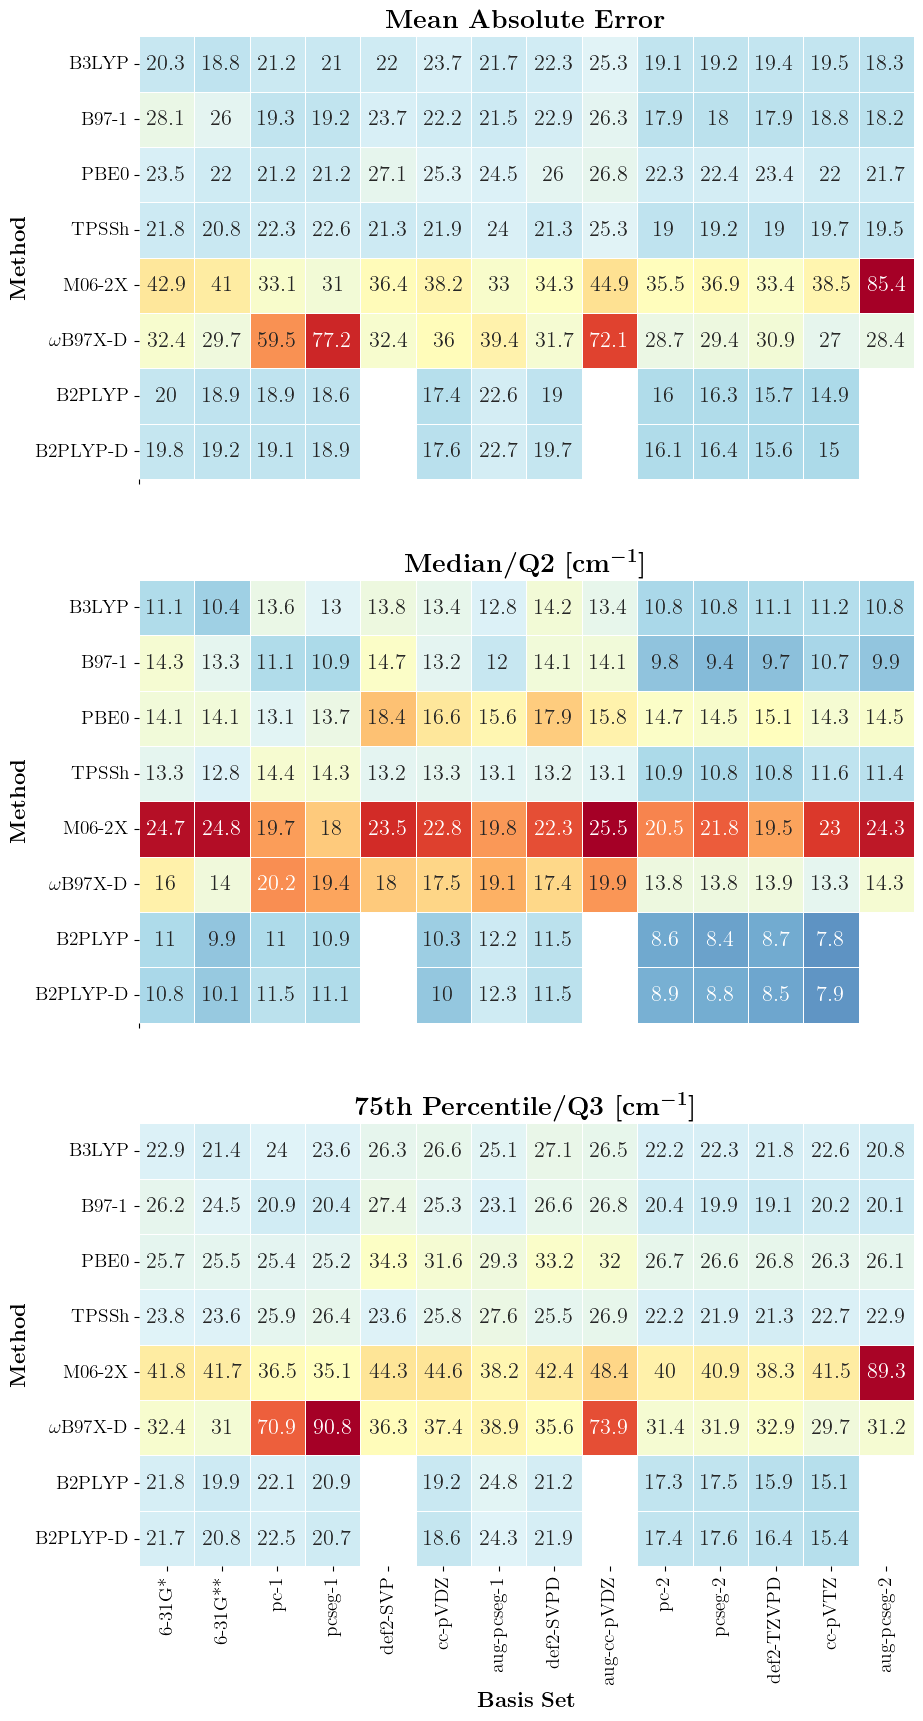

In [15]:
plot_heatmap('RdYlBu_r', 35, 15, 35) #center for: MAE = 35, Q2 = 15, Q3 = 35

## accuracy vs timings bar plot:

In [16]:
labels = ['low', 'mid', 'high']
maes = [low_mae, mid_mae, high_mae]
medians = [low_median, mid_median, high_median]

#function to plot accuracy vs timings bar plot:
def plot_barplot(mae_colour, median_colour) :

    categories = ['low', 'mid', 'high'] #xlables
    maes = [low_mae, mid_mae, high_mae] #y1
    medians = [low_median, mid_median, high_median] #y2

    x = np.arange(len(categories))
    bar_width = 0.2

    fig, ax = plt.subplots()
    
    mae_ax = ax.bar(x - bar_width/2, maes, bar_width, label = 'Mean Absolute Error', color = mae_colour)
    median_ax = ax.bar(x + bar_width/2, medians, bar_width, label = 'Median [$\mathrm{cm^{-1}}$]', color = median_colour)
    
    plt.xlabel(r'\textbf{Computational cost}')
    plt.xticks(x)
    ax.set_xticklabels(categories)
    
    plt.ylabel(r'\textbf{Value}')
    
    plt.legend(handles = [mae_ax, median_ax],
               loc = 'best', title = r'\textbf{Error types:}')
    
    plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\natia\AppData\Local\Temp\ipykernel_18460\3868993601.py:18: SyntaxWarning: invalid escape sequence '\m'
  median_ax = ax.bar(x + bar_width/2, medians, bar_width, label = 'Median [$\mathrm{cm^{-1}}$]', color = median_colour)


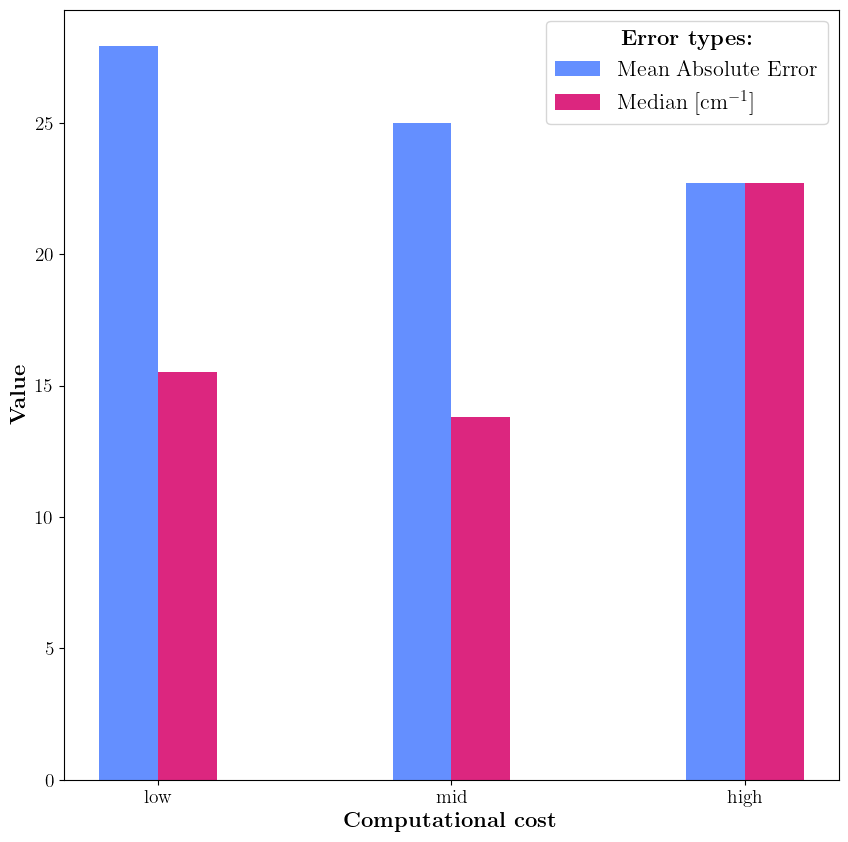

In [17]:
plot_barplot('#648FFF', '#DC267F') #colours for mae and median bars

## accuracy vs timings scatter plot:

In [18]:
#function to plot accuracy vs timings scatter plot:
def plot_scatterplot() :

    plt.figure()

    #plot each model chemistry class separately:
    hdz_plot = plt.scatter(median_vs_timings_df_hdz['Timing'], median_vs_timings_df_hdz['Median'],
                           c = hdz, s = 100, edgecolor = 'black', alpha = 0.8, label = 'Hybrid/DZ')
    htz_plot = plt.scatter(median_vs_timings_df_htz['Timing'], median_vs_timings_df_htz['Median'],
                           c = htz, s = 100, edgecolor = 'black', alpha = 0.8, label = 'Hybrid/TZ')
    dhdz_plot = plt.scatter(median_vs_timings_df_dhdz['Timing'], median_vs_timings_df_dhdz['Median'],
                            c = dhdz, s = 100, edgecolor = 'black', alpha = 0.8, label = 'DH/DZ')
    dhtz_plot = plt.scatter(median_vs_timings_df_dhtz['Timing'], median_vs_timings_df_dhtz['Median'],
                            c = dhtz, s = 100, edgecolor = 'black', alpha = 0.8, label = 'DH/TZ')

    plt.xlabel(r'\textbf{Computational cost}')
    plt.xticks([])
    
    plt.ylabel(median_label)
    
    plt.legend(handles = [hdz_plot, htz_plot, dhdz_plot, dhtz_plot], title = r'\textbf{Model chemistry class:}',
            loc = 'best', bbox_to_anchor = (1, 0.8))

    plt.show()

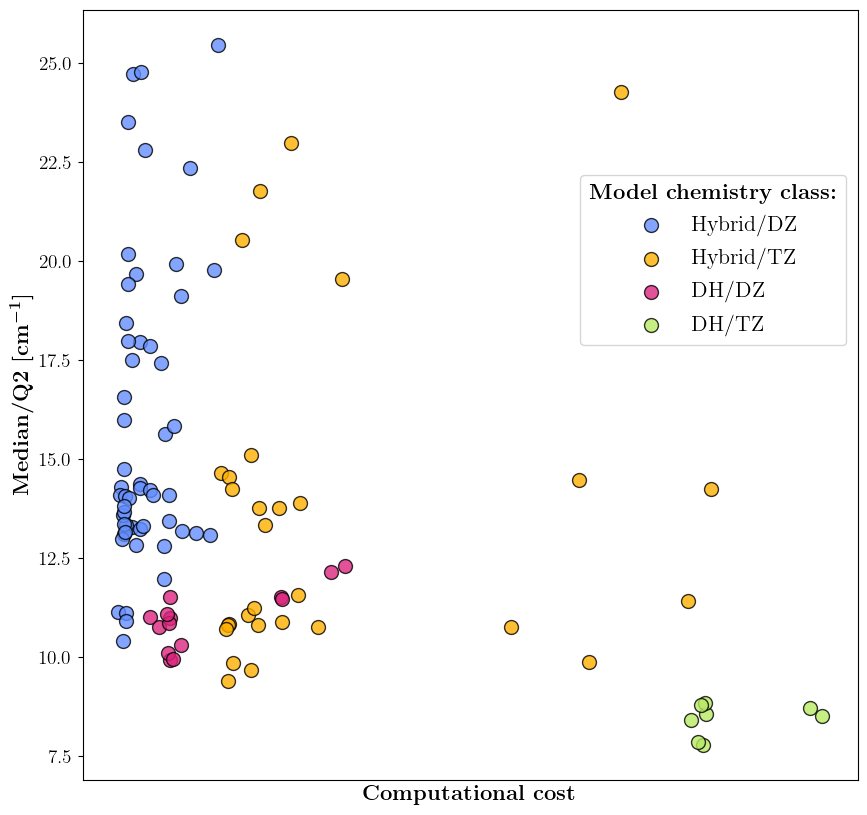

In [19]:
plot_scatterplot()